In [1]:
# Bibliotecas necessárias
import os.path
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests
import torchvision
import torchvision.transforms as transforms

In [15]:
# Definindo as classes
#knife, machete, stiletto, penknife, dagger, knife, cleaver, melee weapon
classes = [
    'weapon', 'dagger', 'drugs', 'cleaver', 'machete', 'airplane', 'bus',
    'knife', 'computer pouch', 'stiletto', 'traffic light', 'melee weapon', 'street sign',
    'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse',
    'sheep', 'chair', 'elephant', 'bear', 'zebra', 'giraffe', 'hat', 'backpack',
    'truck', 'shoe', 'eye glasses', 'handbag', 'tie', 'bag travel', 'frisbee',
    'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'penknife',
    'skateboard', 'knife', 'tennis racket', 'key', 'plate', 'wine glass',
    'cup', 'fork', 'bootle', 'spoon', 'bowl', 'banana', 'apple', 'sandwich',
    'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'knife',
    'couch', 'potted plant', 'bed', 'mirror', 'dining table', 'window', 'desk',
    'toilet', 'door', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'book',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'cell phone', 'scissors',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush', 'hair brush']

In [16]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

In [17]:
model.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [18]:
# Criando a imagem do modelo Faster RCNN
img = cv2.imread('/content/bagagemilicita.jpg')
transform = transforms.Compose([transforms.ToPILImage(), transforms.ToTensor()])
nn_input = transform(img)

In [19]:
output = model([nn_input])

In [20]:
output

[{'boxes': tensor([[ 36.4319,  58.5266, 131.6926, 164.3653],
          [ 34.3983,  64.2584,  46.9180, 130.6891],
          [ 25.6602,  51.9241, 195.7812, 177.8407],
          [ 79.8781,  60.7770,  89.0009, 113.0642],
          [ 81.1982,  56.4728,  88.8306, 109.1048],
          [ 36.6239,  56.5362, 145.7177, 167.5120],
          [ 80.1324,  60.0321,  89.1636, 114.4651],
          [ 34.3304,  64.6496,  46.7120, 129.6292],
          [ 41.2641, 106.3949, 140.3957, 163.1093],
          [ 38.5768,  45.8102, 180.6825, 169.5697],
          [113.9068,  50.0692, 190.3474, 166.2524],
          [115.6654,  56.6721, 130.3188, 140.7507],
          [ 73.1572,  67.3741,  81.2193, 116.6628],
          [ 95.3115,  81.5611, 105.6079, 111.9014],
          [ 72.6919,  66.2599,  81.0807, 112.5004],
          [139.6134,  68.1812, 160.0569, 152.3617],
          [ 74.1027,  64.9655,  81.5084, 112.9583],
          [ 37.5849,  55.8759, 134.6882, 149.2222],
          [ 72.4894,  66.6104,  80.4793, 112.9502],
   

In [21]:
# Passa a imagem pelo modelo
image = cv2.imread('/content/bagagemilicita.jpg')

# Converte a imagem para um tensor
def faster_rcnn(image, model):
    image_tensor = cv2.dnn.blobFromImage(image, size=(300, 300), mean=(104.0, 117.0, 123.0), swapRB=True)
    model.setInput(image_tensor)
    predictions = model.forward()

In [22]:
# Converte a imagem para um tensor
def faster_rcnn(image, model):
    image_tensor = cv2.dnn.blobFromImage(image, size=(300, 300), mean=(104.0, 117.0, 123.0), swapRB=True)
    model.setInput(image_tensor)
    predictions = model.forward()

    # Executa o algoritmo Faster RCNN na imagem
    detections = model.predictions(image)

    # Exibe os resultados da detecção
    for detection in detections:
        x1, y1, x2, y2 = detection["bounding_box"]
        label = detection["label"]

        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(image, label, (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0))

    cv2.imshow("Imagem com detecção de objetos", image)

In [23]:
colors = np.random.uniform(0, 255, size=(len(classes), 3))

for box, box_class, score in zip(output[0]['boxes'].detach().numpy(), output[0]['labels'].detach().numpy(), output[0]['scores'].detach().numpy()):
  box = [(int(box[0]), int(box[1])), (int(box[2]), int(box[3]))]
  color = colors[box_class]
  class_name = classes[box_class]
  # Anotações na imagem
  cv2.rectangle(img, box[0], box[1], color=color, thickness=2)
  cv2.putText(img=img, text=class_name, org=box[0], fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=color, thickness=2)

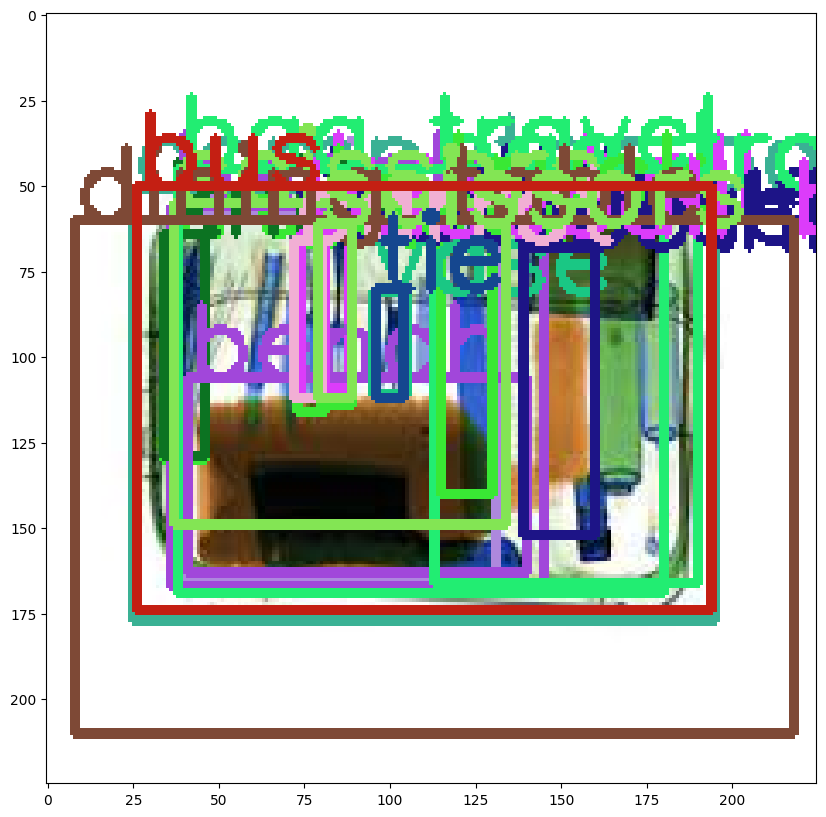

In [24]:
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [25]:
img = cv2.imread('/content/bagagemilicita.jpg')
colors = np.random.uniform(0, 255, size=(len(classes), 3))

for box, box_class, score in zip(output[0]['boxes'].detach().numpy(), output[0]['labels'].detach().numpy(), output[0]['scores'].detach().numpy()):
  if score > 0.5:
    box = [(int(box[0]), int(box[1])), (int(box[2]), int(box[3]))]
    color = colors[box_class]
    class_name = classes[box_class]
    # Anotações na imagem
    cv2.rectangle(img, box[0], box[1], color=color, thickness=2)
    cv2.putText(img=img, text=class_name, org=box[0], fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=color, thickness=2)

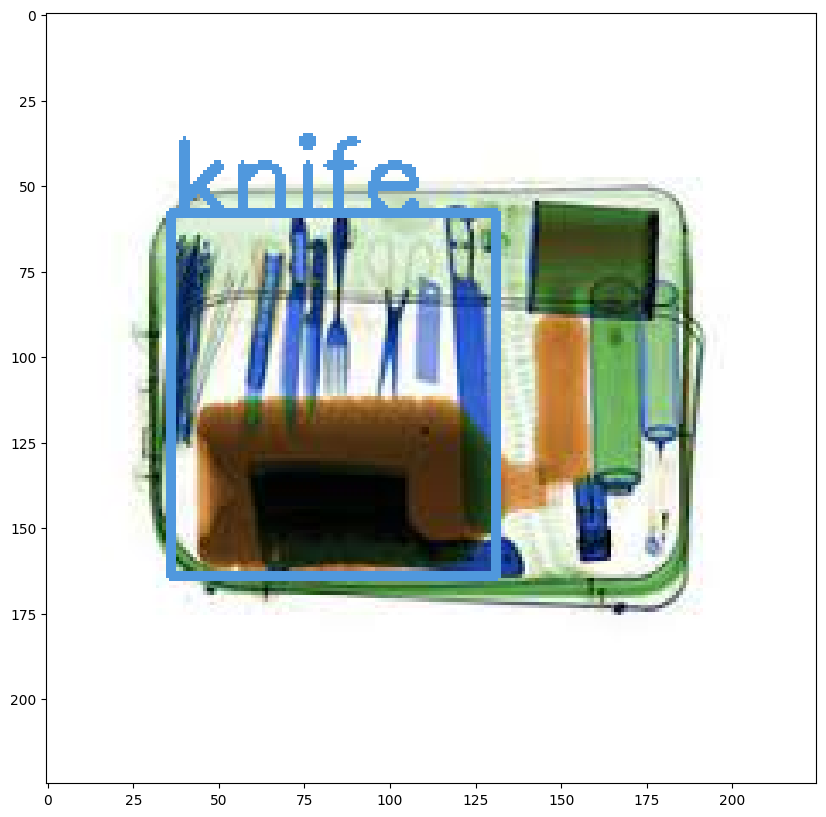

In [26]:
# Knife - faca
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [29]:
import torch
import torchvision
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.transforms import functional as F
from PIL import Image
from sklearn.metrics import precision_score, recall_score, f1_score

# Carregue o modelo Faster R-CNN pré-treinado
model = fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Carregue a imagem
image_path = '/content/bagagemilicita.jpg'
image = Image.open(image_path)
image = F.to_tensor(image).unsqueeze(0)

# Realize a inferência no modelo
with torch.no_grad():
    prediction = model(image)

# Suponha que você tenha rótulos verdadeiros. Substitua isso pelos rótulos reais.
true_labels = [1]  # Exemplo: a classe real é 1

# Extraia as caixas delimitadoras e pontuações das previsões
boxes = prediction[0]['boxes'].numpy()
scores = prediction[0]['scores'].numpy()

# Defina um limiar para as pontuações
score_threshold = 0.5
filtered_boxes = boxes[scores > score_threshold]

# Calcule a métrica da precisão
predicted_labels = [1] * len(filtered_boxes)
precision = precision_score(true_labels, predicted_labels)

# Calcule a métrica de revocação
recall = recall_score(true_labels, predicted_labels)

# Calcule a pontuação F1
f1 = f1_score(true_labels, predicted_labels)

print("Precisão:", precision)
print("Revocação:", recall)
print("F1 Score:", f1)

Precisão: 1.0
Revocação: 1.0
F1 Score: 1.0
